In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ast

In [2]:
opt_values_df = pd.read_csv("v_opt.txt", sep="\t")
opt_values = opt_values_df.v.tolist()

In [3]:

labels = ["4", "6", "8"]
lagrange_markers = {}
for l in labels:
    df = pd.read_csv(f"dual_solver_{l}.csv", sep="\t")
    lagrange_markers[l] = df.i.unique().tolist()

In [4]:
for key, value in lagrange_markers.items():
    lagrange_markers[key] = [x-1 for x in lagrange_markers[key]]
lagrange_markers

{'4': [8, 15, 17, 19, 23, 25, 29, 31, 33, 36, 39, 41, 43, 45, 47, 49],
 '8': [9, 12, 16, 18, 20, 23, 25, 27, 29, 32, 35, 37, 39, 41, 43, 45, 47, 49],
 '6': [11, 15, 18, 20, 25, 27, 31, 35, 37, 43, 45, 47, 49]}

In [5]:
labels = ["4", "6", "8"]

lower_bounds = {}

for l, v in zip(labels, opt_values):
    df = pd.read_csv(f"bounds_{l}.csv", sep="\t")
    lbs = df.lb.div(v).tolist()
    lbs.pop()
    lower_bounds[l] = lbs

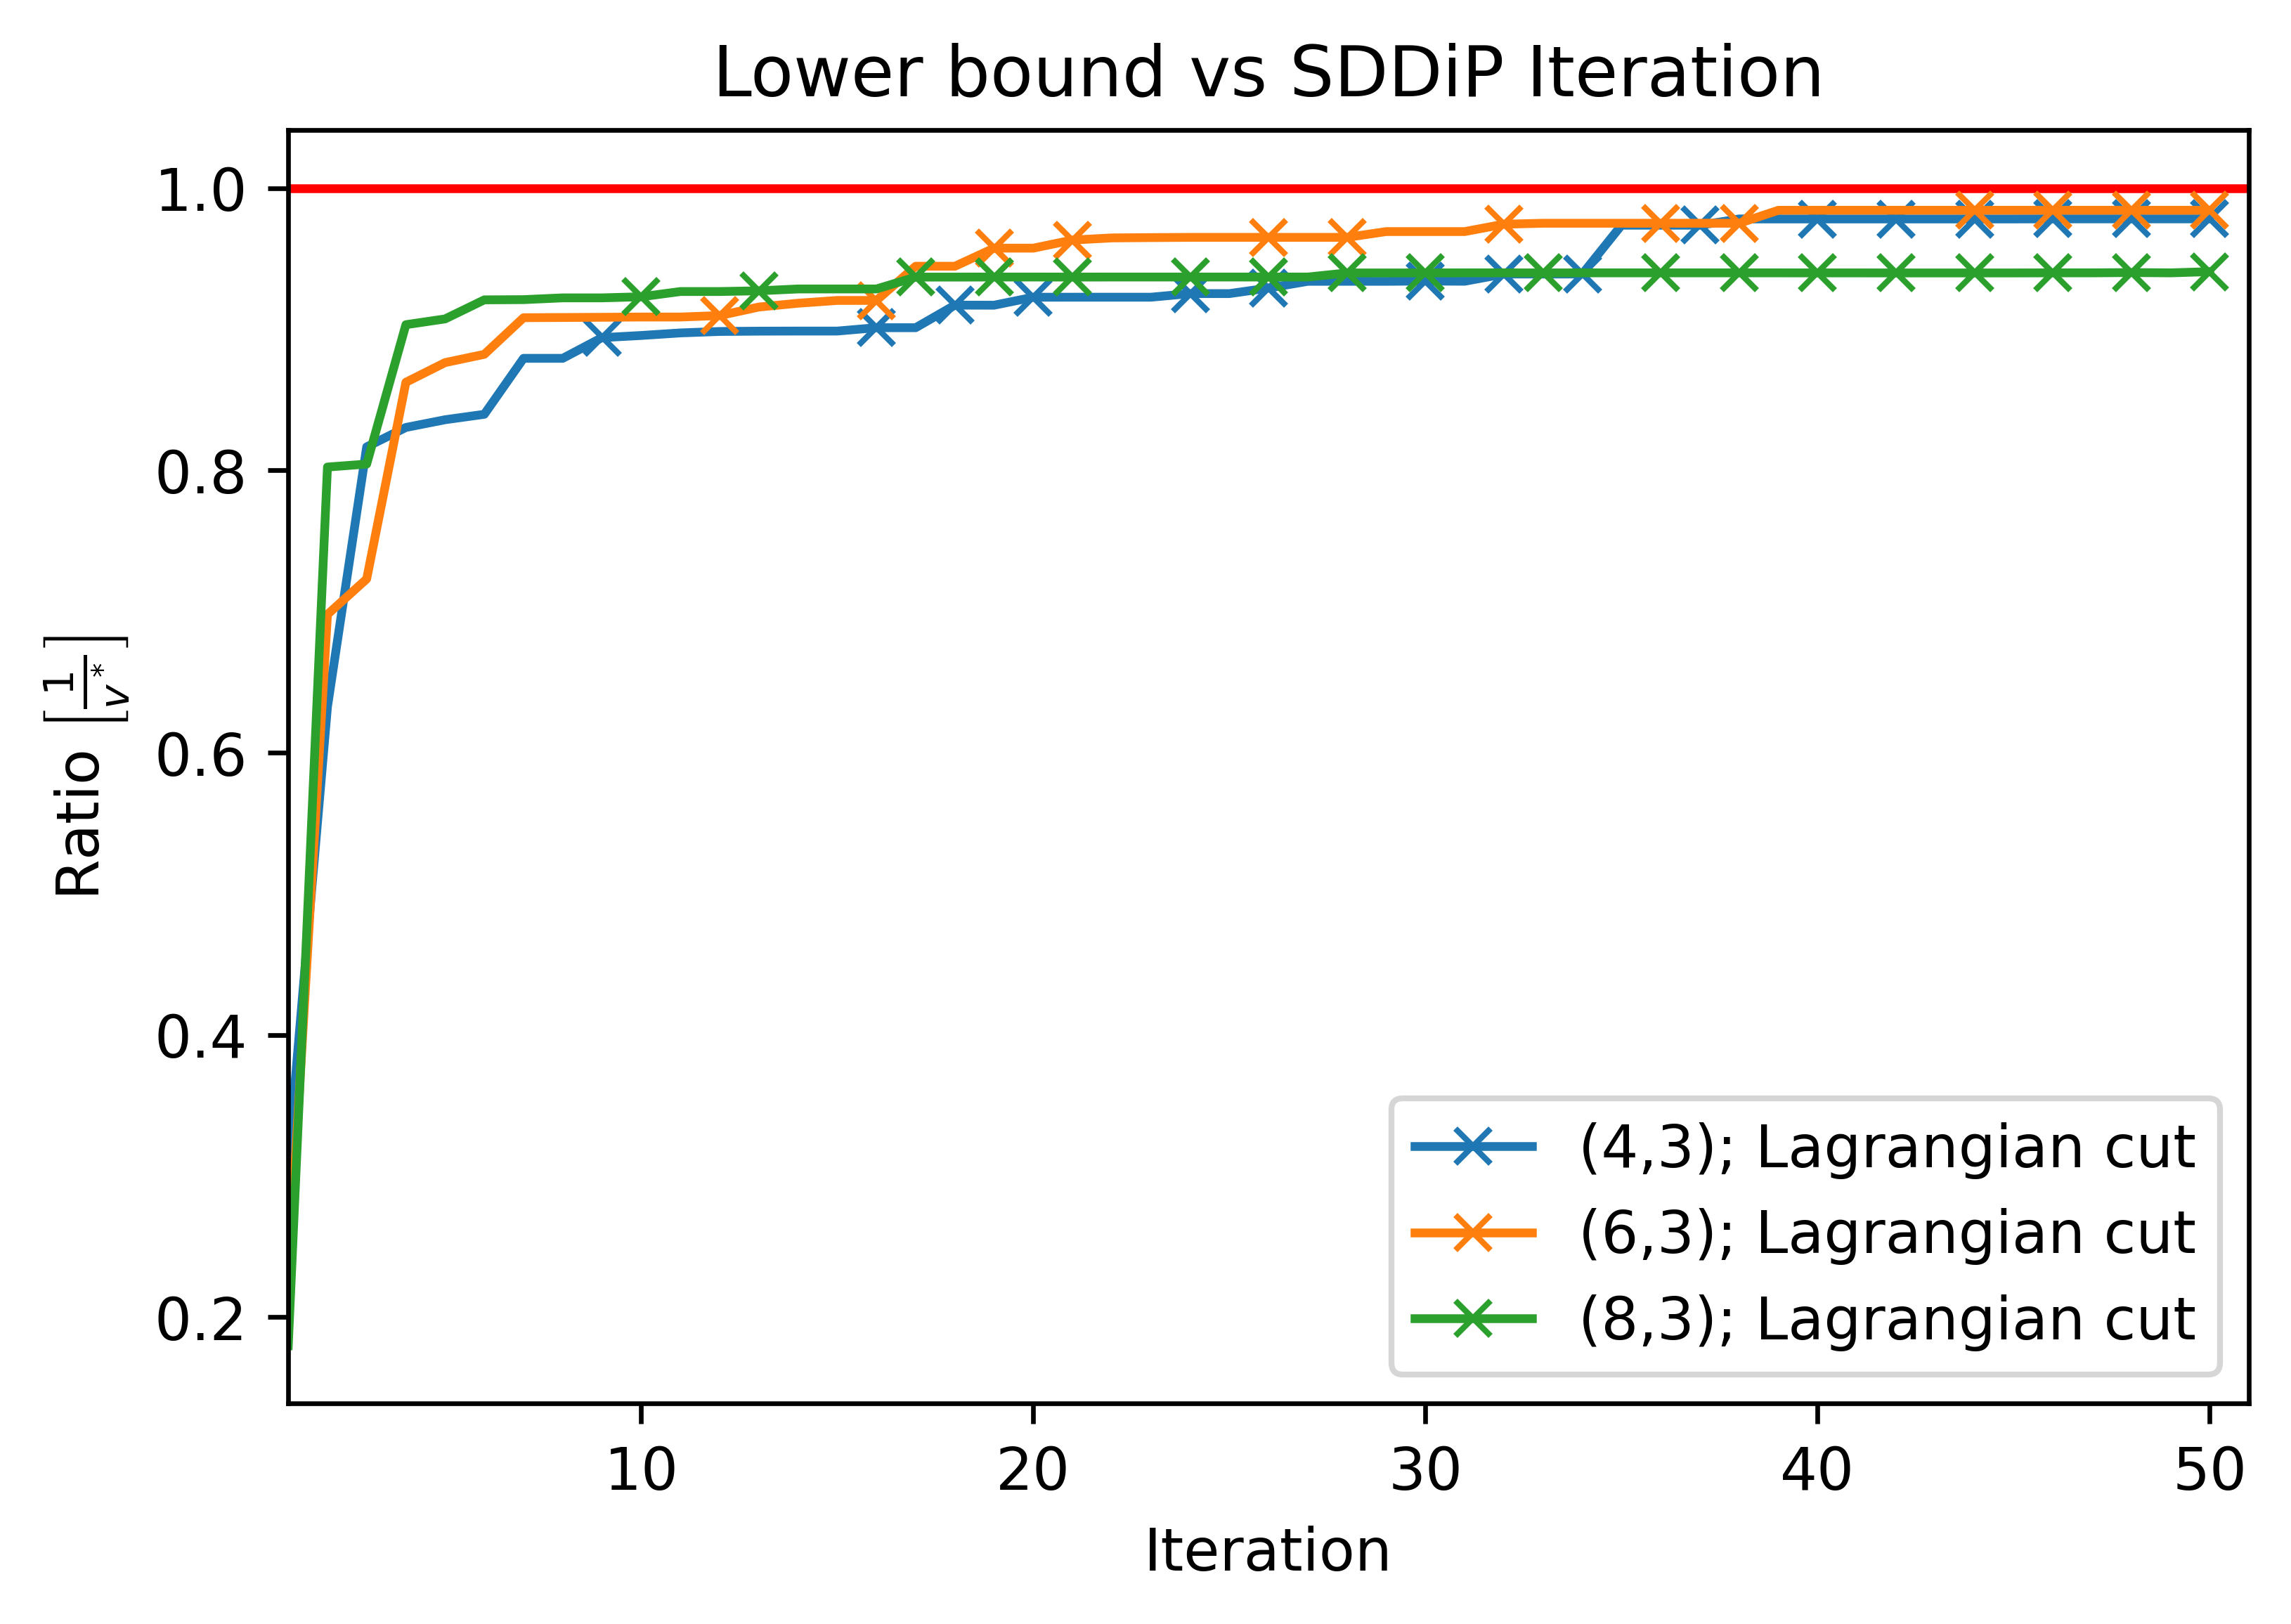

In [6]:
plt.figure(dpi= 600, facecolor='w', edgecolor='k')

plt.axhline(y=1, color="r", linestyle='-')

for l in labels:
    iterations = [i+1 for i in range(len(lower_bounds[l]))]
    plt.plot(iterations, lower_bounds[l], "x", ls='-', markevery=lagrange_markers[l], label=f"({l},3); Lagrangian cut")

plt.gca().set(xlabel="Iteration", ylabel=r"Ratio $\left[\frac{1}{v^*}\right]$")
plt.title("Lower bound vs SDDiP Iteration")
plt.xlim([1, 51])
plt.legend(loc=4)
plt.show()